## 5.2 Introduction to Convnets

(1) 케라스 창시자에게 배우는 딥러닝 도서의 실습 코드 입니다. <br><br>
(2) 코드를 이해한 후, 각 입력창 마다 주석을 추가해 보았습니다. <br><br>
(3) 필요 시 입력 창을 Add 하여 내용을 추가하였습니다.  <br><br>
(4) 번역자의 원 코드가 있는 Github URL은 아래와 같습니다. <br><br>
https://github.com/rickiepark/deep-learning-with-python-notebooks

In [4]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)         # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

In [5]:
import keras
keras.__version__

'2.3.1'

In [6]:
import os, shutil

In [7]:
# original dataset path
original_dataset_dir = './image/datasets/cats_and_dogs/train'

# 소규모  data 저장 directory
base_dir = './image/datasets/cats_and_dogs_small'
if os.path.exists(base_dir):       # 반복적인 실행을 위해 directory 삭제
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

# training, verification, test 를 위해 각각 directory 생성
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# train directory 하위에 cats directory 생성 : ./image/datasets/cats_and_dogs_small/train/cats
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# train directory 하위에 dogs directory 생성 : ./image/datasets/cats_and_dogs_small/train/dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# validation directory 하위에 cats directory 생성 : ./image/datasets/cats_and_dogs_small/validation/cats
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# validation directory 하위에 dogs directory 생성 : ./image/datasets/cats_and_dogs_small/validation/dogs
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# test directory 하위에 cats directory 생성 : ./image/datasets/cats_and_dogs_small/test/cats
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# test directory 하위에 cats directory 생성 : ./image/datasets/cats_and_dogs_small/test/dogs
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# original_dataset_dir의 1000개(0 ~ 999)의 cat data를 ./image/datasets/cats_and_dogs_small/train/cats 에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# original_dataset_dir의 500개(1000 ~ 1499)의 cat data를 ./image/datasets/cats_and_dogs_small/validation/cats 에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# original_dataset_dir의 500개(1500 ~ 1999)의 cat data를 ./image/datasets/cats_and_dogs_small/test/cats 에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# original_dataset_dir의 1000개(0 ~ 999)의 dog data를 ./image/datasets/cats_and_dogs_small/train/dogs 에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# original_dataset_dir의 500개(1000 ~ 1499)의 dog data를 ./image/datasets/cats_and_dogs_small/validation/dogs 에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# original_dataset_dir의 500개(1500 ~ 1999)의 dog data를 ./image/datasets/cats_and_dogs_small/test/dogs 에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### Cat, Dog 각각의 File Copy가 잘 되었는지 확인

In [8]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [9]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [10]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [11]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [12]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [13]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


### Network 구성

In [14]:
from keras import layers
from keras import models

# 선형으로 쌓는 Sequential 모델을 이용
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# 입력 parameter는 150*150*3 의 dog or cat image 이고, Channel이 32인 3*3 필터를 통해  CNN 연산을 수행
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (150 + 2*0 - 3) / 1 + 1 = 148 이 됨 (즉, Output Height = 148)
#  OW = (W + 2P - FW) / S + 1 = (150 + 2*0 - 3) / 1 + 1 = 148 이 됨 (즉, Output Width = 148)
# Channel = 32 이므로, Output Shape은 (148, 148, 32)
#  그러므로 paramter갯수는 3 * (3*3*32) + 32 = 896

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 입력 parameter는 74*74*32 이고, Channel이 64인 3*3 필터를 통해  CNN 연산을 수행 (MaxPooling으로 OH, OW 축소)
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (74 + 2*0 - 3) / 1 + 1 = 71 이 됨 (즉, Output Height = 71)
#  OW = (W + 2P - FW) / S + 1 = (74 + 2*0 - 3) / 1 + 1 = 71 이 됨 (즉, Output Width = 71)
# Channel = 64 이므로, Output Shape은 (71, 71, 64)
#  그러므로 paramter갯수는 32 * (3*3*64) + 64 = 18496

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# 입력 parameter는 35*35*64 이고, Channel이 128인 3*3 필터를 통해  CNN 연산을 수행 (MaxPooling으로 OH, OW 축소)
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (35 + 2*0 - 3) / 1 + 1 = 33 이 됨 (즉, Output Height = 33)
#  OW = (W + 2P - FW) / S + 1 = (35 + 2*0 - 3) / 1 + 1 = 33 이 됨 (즉, Output Width = 33)
# Channel = 128 이므로, Output Shape은 (33, 33, 128)
#  그러므로 paramter갯수는 64 * (3*3*128) + 128 = 73856

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# 입력 parameter는 16*16*128 이고, Channel이 128인 3*3 필터를 통해  CNN 연산을 수행 (MaxPooling으로 OH, OW 축소)
# OH:Output Height, H:Height, W:Width, P:Padding, FH:Filter Height FW:Filter Width, S:Stride 일때,
#  OH = (H + 2P - FH) / S + 1 = (16 + 2*0 - 3) / 1 + 1 = 14 이 됨 (즉, Output Height = 14)
#  OW = (W + 2P - FW) / S + 1 = (16 + 2*0 - 3) / 1 + 1 = 14 이 됨 (즉, Output Width = 14)
# Channel = 128 이므로, Output Shape은 (14, 14, 128)
#  그러므로 paramter갯수는 128 * (3*3*128) + 128 = 147584

model.add(layers.MaxPooling2D((2, 2)))
# 2*2 필터를 이용하여 MaxPooling 수행 (학습해야 할 Parameter가 없고, 채널 수가 변하지 않음)
# 2*2 필터를 사용했으므로, OH, OW는 1/2로 축소 됨

model.add(layers.Flatten())
# Fully Connected Network(Dense Network, 완전연결층)에 주입하기 위해 Flatten 작업
# 출력층(7*7*128)  -> 6272 으로 Flatten 하고, parameter 갯수는 변경 없음

model.add(layers.Dense(512, activation='relu'))
# Fully Connected Network에 주입
# Dense Network 이므로, Parameter의 갯수는 7*7*128 * 512 + 512 = 3211776

model.add(layers.Dense(1, activation='sigmoid'))
# 이진 분류를 위해 활성화 함수는 'sigmoid'를 이용, Fully Connected Network에 주입
# Dense Network 이므로, Parameter의 갯수는 512 * 1 + 1 = 513
# 그러므로 총 Parameter 수는 896 + 18496 + 73856 + 147584 + 3211776 + 513 = 3,453,121

### Parameter 계산
![title](./image/cat,dog_cnn_parameter.jpg)

https://s3.ap-northeast-2.amazonaws.com/ikukang.ml-cnn-parameter/Parameter_Calculation.xlsx

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

### Model Summary Image
![title](./image/cat,dog_cnn_summary.jpg)

In [16]:
# compile method를 이용하여 학습 과정을 구성
# 옵티마이저는 rmsprop를 사용하고, 이진 분류 문제이므로 손실함수는 binary_crossentropy를 이용
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Data 전처리

In [17]:
# Keras의 ImageDataGenerator package를 import
# 해당 ImageDataGenerator class에서 disk의 image file을 전처리 된 
# 텐서로 자동으로 바꿔주는 Python Generator를 생성 함
from keras.preprocessing.image import ImageDataGenerator

# Image 텐서 각각의 원소를 255로 나누어 0~1 사이의 값으로 정규화
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training Data에 대하여 150*150 행렬로 변환하고, class_mode는 이진분류를 사용한 generator 생성
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

# Validation Data에 대하여 150*150 행렬로 변환하고, class_mode는 이진분류를 사용한 generator 생성
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
# Training/Validation data and label 텐서 구조
for data_batch, labels_batch in train_generator:
    print('Training batch data size:', data_batch.shape)
    print('Training batch label size:', labels_batch.shape)
    break

for data_batch, labels_batch in validation_generator:
    print('Validation batch data size:', data_batch.shape)
    print('Validation batch label size:', labels_batch.shape)
    break

Training batch data size: (20, 150, 150, 3)
Training batch label size: (20,)
Validation batch data size: (20, 150, 150, 3)
Validation batch label size: (20,)


In [19]:
# fit method를 이용해서 정해진 epoch 만큼  Training을 수행
# 이때 위에서 재 정의한 image, label을 주입하고, batch size를 지정

# 기존에는 fit method를 이용하여 정해진 epoch 만큼 Training을 수행하였으나, 금번에는 fit_generator method를 이용
# 해당 method는 python의  generator를 이용하므로, steps_per_epoch에서 추출할 sample 갯수를 지정해야 함 (100개)
# 30번의 epoch 동안 반복하여 training을 수행하고, validation_data parameter도 함께 전달하여 loss와 accuracy를 평가

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


Epoch 1/30
100/100 [==============================] - 68s 684ms/step - loss: 0.6866 - acc: 0.5475 - val_loss: 0.6811 - val_acc: 0.5190
Epoch 2/30
100/100 [==============================] - 67s 672ms/step - loss: 0.6596 - acc: 0.5935 - val_loss: 0.6512 - val_acc: 0.5540
Epoch 3/30
100/100 [==============================] - 68s 681ms/step - loss: 0.6104 - acc: 0.6630 - val_loss: 0.5962 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 68s 675ms/step - loss: 0.5687 - acc: 0.7140 - val_loss: 0.5974 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 67s 672ms/step - loss: 0.5416 - acc: 0.7255 - val_loss: 0.6083 - val_acc: 0.6560
Epoch 6/30
100/100 [==============================] - 67s 668ms/step - loss: 0.5148 - acc: 0.7530 - val_loss: 0.4669 - val_acc: 0.6760
Epoch 7/30
100/100 [==============================] - 66s 664ms/step - loss: 0.4939 - acc: 0.7710 - val_loss: 0.7655 - val_acc: 0.6780
Epoch 8/30
100/100 [==============================] - 

In [20]:
# Training이 끝난 모델을 저장하여 필요 시 재 사용
model.save('cats_and_dogs_small_1.h5')

### Training Data, Validation Data에 대한 Model의 loss와 accuracy

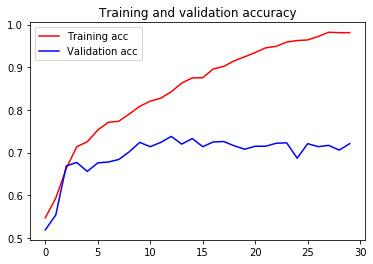

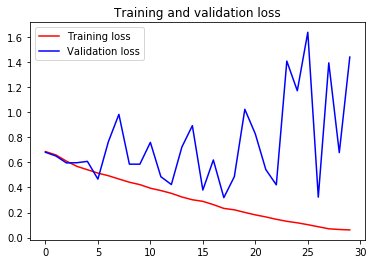

In [21]:
# Training Data와 Validation Data에 대한 Model의 Loss와 Accuracy를 그래프로 확인

# (1) Accuracy
# Training Accuracy의 경우, 훈련이 진행됨에 따라 거의 100%에 근접하나, Validation Accuracy는 70%에서 정체되어 있음

# (2) Loss
# Training Loss의 경우, 훈련이 진행됨에 따라 0으로 수렴하고 있으나,Validation Loss의 경우 5째 epoch에서 최소가 된 후, overfitting이 발생하여 불규칙적으로 발산하고 있음

# 이는 훈련 Sample의 갯수가 적어서 과대적합이 쉽게 발생되는 문제로,
#  - 훈련 Data의 갯수를 늘임
#  - L1, L2 Norm 등을 이용하여 같이 가중치 규제를 추가
#  - Dropout
#  등의 방법으로 Overfitting 발생 시점을 지연시킬 수 있음

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Data Augmentation (Data 증식)

In [19]:
# Keras의 ImageDataGenerator method를 이용하여 Data 증식
# 실제 적용하기 전에 예제를 먼저 만들어 봄
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# rotation_range : image를 random하게 회전시키는 각도 (0 ~ 180)
# width_shift_range : image를 수평으로 ramdom 하게 평행이동 시키는 범위 (전체 넓이와 폭에 대한 비율)
# height_shift_range : image를 수직으로 ramdom 하게 평행이동 시키는 범위 (전체 넓이와 높이에 대한 비율)
# shear_range : image를 ramdom하게 전단(shear) 변환을 적용할 각도 범위
# zoom_range : image를 ramdom 하게 확대할 범위
# horizontal_flip : image를 ramdom 하게 수평으로 뒤집기
# fill_mode : rotation, shift 등으로 새롭게 생성해야 할 fixel을 어떻게 생성할 것인지 명시  ("constant", "nearest", "reflect" or "wrap")
# 관련 세부 내용은 Keras site 참조

ImageDataGenerator 관련 세부 내용은 Keras site 참조 (https://keras.io/preprocessing/image/)

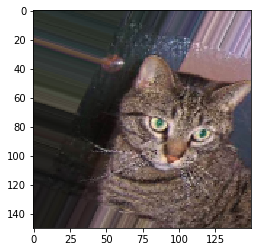

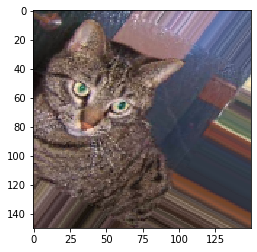

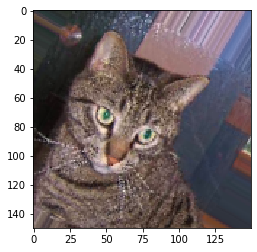

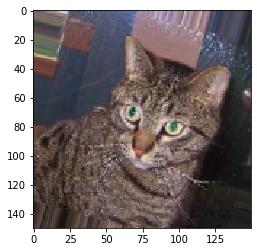

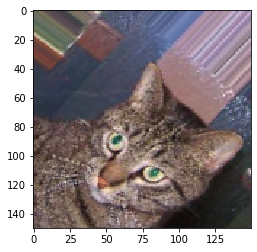

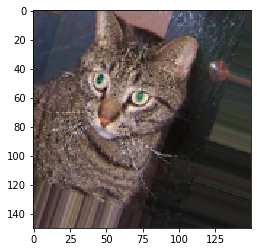

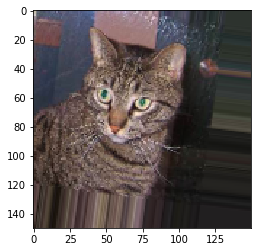

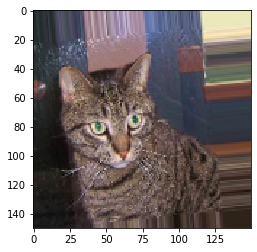

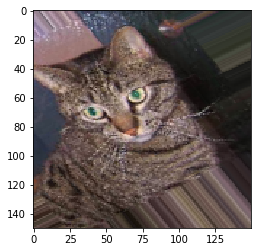

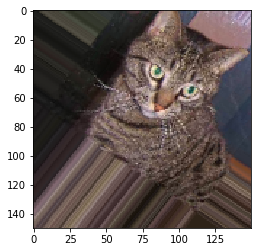

In [25]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 image 선택
img_path = fnames[1]

# image의 크기를 (150*150)로 변경해서 로딩
img = image.load_img(img_path, target_size=(150, 150))

# 위에서 변경한 image를 (150*150*3) 의 텐서로 변환
x = image.img_to_array(img)

# 해당 텐서를 다시 (1*150*150*3) 의 텐서로 reshape
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!

# flow method를 이용하여 random하게 변환된 image에 대한 batch 생성
# 무한 반복되므로, 아래의 경우 10개 까지만 display 하도록 조정
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 10 == 0:
        break

plt.show()

In [21]:
# data augmentation(데이터 증식)을 통해, 동일하지 않은 data를 생성할 수 있었으나, 적은 수의 원본 image에서 만들었기 때문에
# 입력 Data 사이에 상호 연관성이 큰 상태임
# 때문에 아직 overfitting을 억제하기에 충분치 않으므로, droupout을 통해 이를 좀 더 억제하고자 함

# 즉, 앞에서 생성한 모델과 동일하나, Flatten 후  dropout 작업을 추가하여 overfitting을 억제하고자 함
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# Flatten(평탄화) 작업 후 droupout 수행
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile method를 이용하여 학습 과정을 구성
# 옵티마이저는 rmsprop를 사용하고, 이진 분류 문제이므로 손실함수는 binary_crossentropy를 이용
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Data Augmentation 과 Dropout을 이용한 재 Training

In [22]:
# training data를 증식
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

# rotation_range : image를 random하게 회전시키는 각도 (0 ~ 180)
# width_shift_range : image를 수평으로 ramdom 하게 평행이동 시키는 범위 (전체 넓이와 폭에 대한 비율)
# height_shift_range : image를 수직으로 ramdom 하게 평행이동 시키는 범위 (전체 넓이와 높이에 대한 비율)
# shear_range : image를 ramdom하게 전단(shear) 변환을 적용할 각도 범위
# zoom_range : image를 ramdom 하게 확대할 범위
# horizontal_flip : image를 ramdom 하게 수평으로 뒤집기
# fill_mode : rotation, shift 등으로 새롭게 생성해야 할 fixel을 어떻게 생성할 것인지 명시  ("constant", "nearest", "reflect" or "wrap")
# 관련 세부 내용은 Keras site 참조

# validation data는 증식하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

# Training Data에 대하여 150*150 행렬로 변환하고, class_mode는 이진분류를 사용한 generator 생성
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# Validation Data에 대하여 150*150 행렬로 변환하고, class_mode는 이진분류를 사용한 generator 생성
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# fit method를 이용해서 정해진 epoch 만큼  Training을 수행
# 이때 위에서 재 정의한 image, label을 주입하고, batch size를 지정
# 기존에는 fit method를 이용하여 정해진 epoch 만큼 Training을 수행하였으나, 금번에는 fit_generator method를 이용
# 해당 method는 python의  generator를 이용하므로, steps_per_epoch에서 추출할 sample 갯수를 지정해야 함 (100개)
# 100번의 epoch 동안 반복하여 training을 수행하고, validation_data parameter도 함께 전달하여 loss와 accuracy를 평가
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 35s 349ms/step - loss: 0.6904 - acc: 0.5305 - val_loss: 0.6399 - val_acc: 0.5730
Epoch 2/100
100/100 [==============================] - 33s 326ms/step - loss: 0.6803 - acc: 0.5679 - val_loss: 0.6662 - val_acc: 0.5747
Epoch 3/100
100/100 [==============================] - 32s 323ms/step - loss: 0.6588 - acc: 0.5960 - val_loss: 0.7677 - val_acc: 0.5831
Epoch 4/100
100/100 [==============================] - 33s 334ms/step - loss: 0.6479 - acc: 0.6215 - val_loss: 0.6233 - val_acc: 0.6785
Epoch 5/100
100/100 [==============================] - 33s 327ms/step - loss: 0.6250 - acc: 0.6428 - val_loss: 0.5730 - val_acc: 0.6136
Epoch 6/100
100/100 [==============================] - 35s 347ms/step - loss: 0.6078 - acc: 0.6689 - val_loss: 0.4737 - val_acc: 0.6733
Epoch 7/100
100/100 [==============================] - 32s 320ms/step - loss: 0.5958 - acc: 0.6767 -

In [23]:
# Training이 끝난 모델을 저장하여 필요 시 재 사용
model.save('cats_and_dogs_small_2.h5')

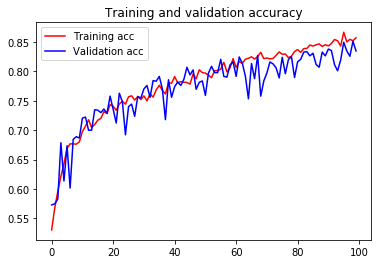

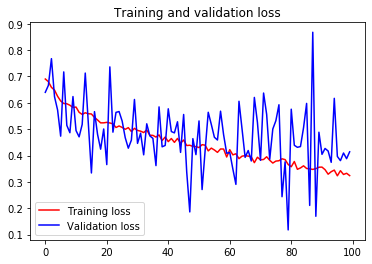

In [24]:
# Training Data와 Validation Data에 대한 Model의 Loss와 Accuracy를 그래프로 확인

# (1) Accuracy
# Training Accuracy, Validation Accuracy 모두 우 상향 추세로, Overfitting 없이 Accuracy가 증가하고 있음

# (2) Loss
# Training Loss의 경우, 훈련이 진행됨에 따라 우 하향 추세로 작아지고 있고, Validation Loss의 경우, epoch가
# 진행되면서 진폭이 커지기는 하나,발산이 크게 진행되지 않으면서 우 하향 추세로 진행되고 있음
# 결과적으로 Overfitting이 심하게 발생하지 않는 것으로 보임

# Data Augmentation 및 Dropout으로 Overfitting을 어느정도 감쇄 시키는 효과가 있는 것으로 보임

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

그림 5-12와 5-13을 참고하세요. 데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성하였습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다. 다음 두 절에서 이에 대해 집중적으로 살펴보겠습니다.